In [402]:
import numpy as numpy
import pandas as pd

In [403]:
df = pd.read_csv('spam.csv', encoding='latin1')  # or 'ISO-8859-1'


In [404]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [405]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [406]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [407]:
df.shape

(5572, 5)

1.Data cleaning

2. EDA

3.Text preprocessing

4. Model building

5. Evaluation

6.Improvements

7. website

8. deploying 

In [408]:
 # 1. Data cleaning

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [410]:
## drop the last 3cols
df = df.drop(columns=['Unnamed: 2' , 'Unnamed: 3', 'Unnamed: 4'])

In [411]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [412]:
df = df.rename(columns={'v1': 'target', 'v2': 'text'})

In [413]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [414]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [415]:
df['target']=encoder.fit_transform(df['target'])

In [416]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [417]:
##missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [418]:
#check for duplicate values
df.duplicated().sum()

403

In [419]:
df=df.drop_duplicates(keep='first')

In [420]:
df.duplicated().sum()

0

2.EDA

In [421]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

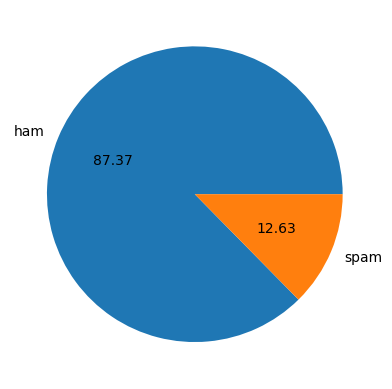

In [422]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [423]:
##by this data is imbalance

In [424]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [425]:
df['num_characters']=df['text'].apply(len)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_18716\399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [426]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [427]:
##number of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\nikhi\AppData\Local\Temp\ipykernel_18716\1072760173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [428]:
df['num_sentence']=df['text'].apply(lambda x:len((nltk.sent_tokenize(x))))

C:\Users\nikhi\AppData\Local\Temp\ipykernel_18716\1121008979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence']=df['text'].apply(lambda x:len((nltk.sent_tokenize(x))))


In [429]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [430]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [431]:
#describe for ham

df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [432]:
## describe for spam
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()


,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [433]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

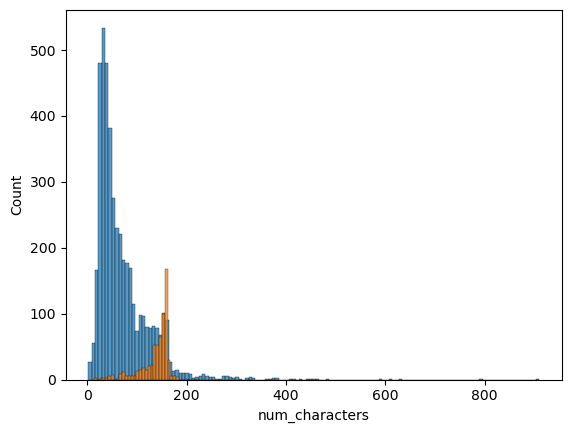

In [434]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

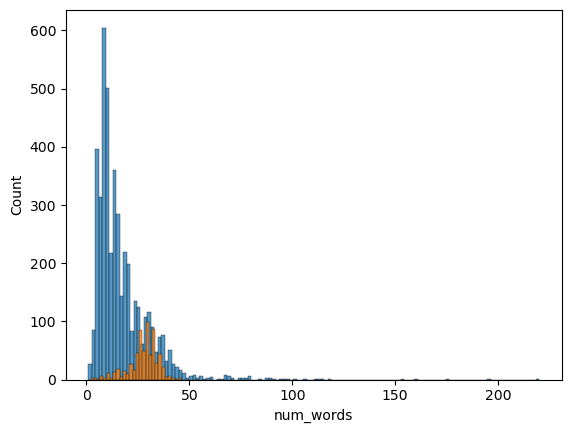

In [435]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

<Axes: xlabel='num_sentence', ylabel='Count'>

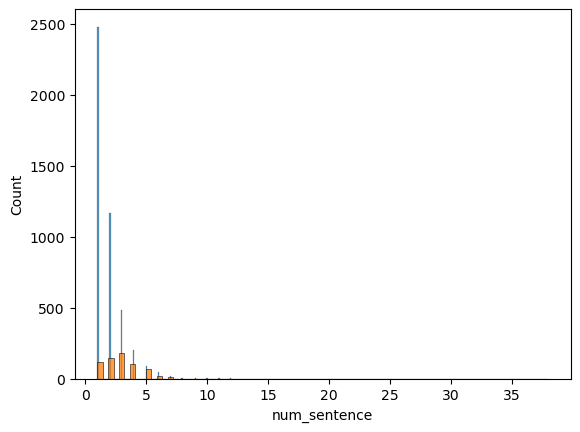

In [436]:
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'])

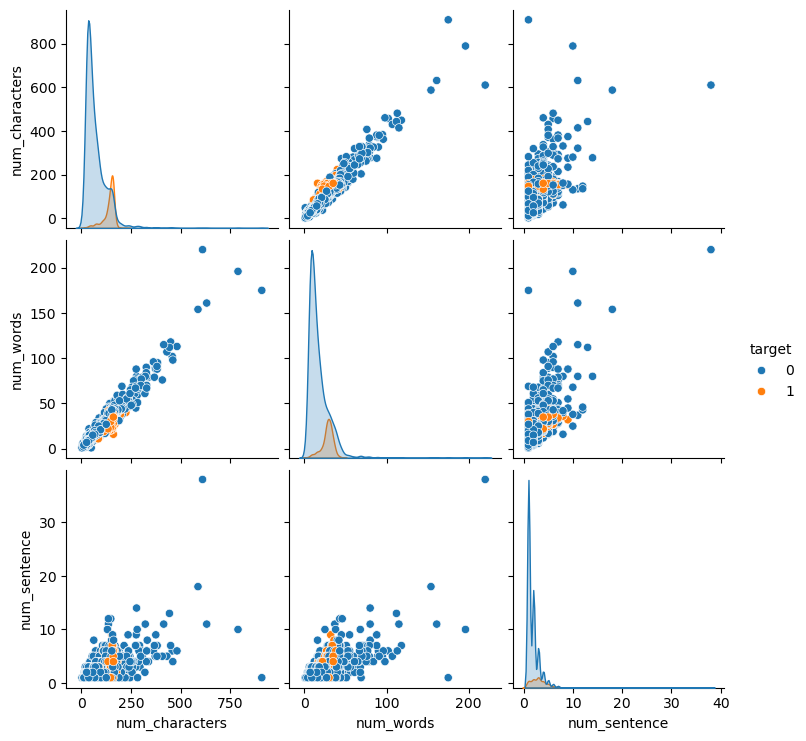

In [437]:
sns.pairplot(df,hue='target')

In [438]:
df.corr(numeric_only=True)


,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

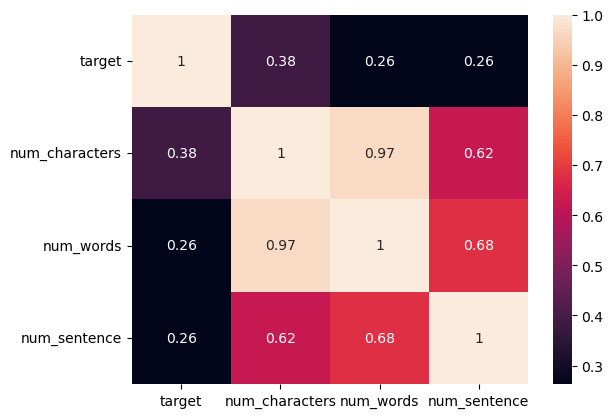

In [439]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

3.Data preprocessing/text preprocessing

   1.lowercase

   2.tokenization

   3.removing special characters

   4.removing stopwords and puncations

   5.stemming

In [440]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [441]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [442]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [443]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in set(stopwords.words('english')) and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)



In [444]:
transform_text('Hello HOW ARE YOU  doing on my 20% thsi is  learning Machine Learning %%')

'hello 20 thsi learn machin learn'

In [445]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_18716\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [446]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [447]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [448]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'] .str.cat(sep=''))

In [449]:
spam_wc

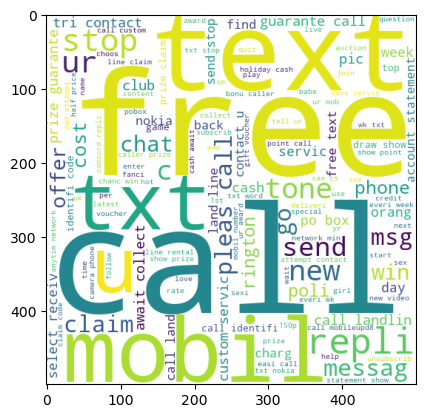

In [450]:
plt.imshow(spam_wc)

In [451]:
spam_wc=wc.generate(df[df['target']==0]['transformed_text'] .str.cat(sep=''))

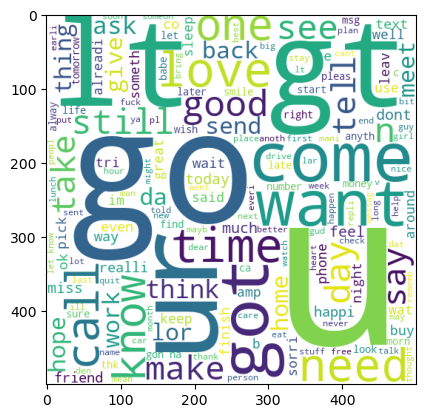

In [452]:
plt.imshow(spam_wc)

In [453]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [454]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
        
    


In [455]:
len(spam_corpus)

9939

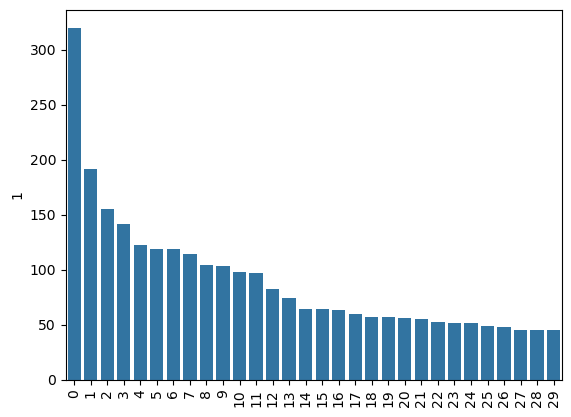

In [456]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [457]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [458]:
len(ham_corpus)

35404

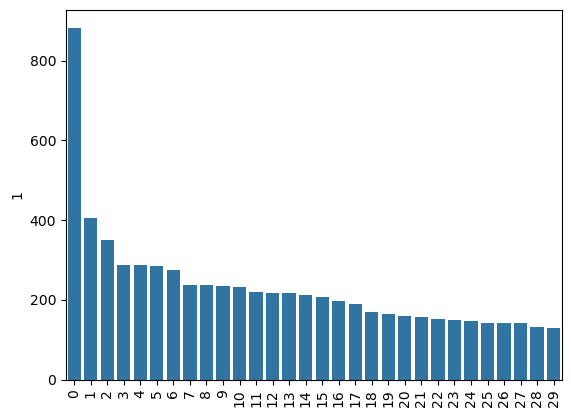

In [459]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [460]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import numpy as np


In [461]:
#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [462]:
#x = cv.fit_transform(df['transformed_text']).toarray()

In [463]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [464]:
x= tfidf.fit_transform(df['transformed_text']).toarray()

In [465]:
#x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [466]:
x.shape

(5169, 3000)

In [467]:
y = df['target'].values

In [468]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [469]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=1)

In [470]:

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [471]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
[[778 121]
 [ 24 111]]
0.47844827586206895


In [472]:

mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9613152804642167
[[899   0]
 [ 40  95]]
1.0


In [473]:

bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[898   1]
 [ 30 105]]
0.9905660377358491


In [474]:
 #taken ##tfidf -> mnb

In [475]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [476]:
svc = SVC(kernel='sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state = 2)

In [477]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [478]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [479]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9690522243713733, 0.9557522123893806)

In [480]:
accuracy_scores= []
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    print("For",name)
    print("Accuracy-",current_accuracy)
    print('Precision',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy- 0.9690522243713733
Precision 0.9557522123893806
For KN
Accuracy- 0.913926499032882
Precision 1.0
For NB
Accuracy- 0.9613152804642167
Precision 1.0
For DT
Accuracy- 0.9129593810444874
Precision 0.7528089887640449
For LR
Accuracy- 0.9410058027079303
Precision 0.8854166666666666
For RF
Accuracy- 0.9680851063829787
Precision 1.0


c:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy- 0.9613152804642167
Precision 0.9439252336448598
For BgC
Accuracy- 0.9458413926499033
Precision 0.8376068376068376
For ETC
Accuracy- 0.9709864603481625
Precision 0.981651376146789
For GBDT
Accuracy- 0.9342359767891683
Precision 0.8316831683168316
For xgb
Accuracy- 0.9574468085106383
Precision 0.9099099099099099


In [481]:

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [482]:
#performance_df

In [483]:
performace_df1 = pd.melt(performance_df,id_vars='Algorithm')

In [484]:
performace_df1

,Algorithm,variable,value
0,KN,Accuracy,0.913926
1,NB,Accuracy,0.961315
2,RF,Accuracy,0.968085
3,ETC,Accuracy,0.970986
4,SVC,Accuracy,0.969052
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.957447
7,LR,Accuracy,0.941006
8,BgC,Accuracy,0.945841
9,GBDT,Accuracy,0.934236


In [485]:
##model improvement

In [486]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_300': accuracy_scores,'Precision_max_ft_3000': precision_scores})

In [487]:
new_df_scaled = performance_df.merge(temp_df,on='Algorithm')

In [488]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_300,Precision_max_ft_3000
0,KN,0.913926,1.000000,0.913926,1.000000
1,NB,0.961315,1.000000,0.961315,1.000000
2,RF,0.968085,1.000000,0.968085,1.000000
3,ETC,0.970986,0.981651,0.970986,0.981651
4,SVC,0.969052,0.955752,0.969052,0.955752
5,AdaBoost,0.961315,0.943925,0.961315,0.943925
6,xgb,0.957447,0.909910,0.957447,0.909910
7,LR,0.941006,0.885417,0.941006,0.885417
8,BgC,0.945841,0.837607,0.945841,0.837607
9,GBDT,0.934236,0.831683,0.934236,0.831683


In [490]:
import pickle
pickle.dump(tfidf,open('vectorize.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))